# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below.

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [83]:
# Codewrite cell (Use as you wish)
def custom_kmeans(X, n_clusters, n_init=10, max_iter=300, tol=1e-4, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    best_inertia = np.inf
    best_centroids = None
    best_labels = None

    for _ in range(n_init):
        # Randomly initialize the centroids
        centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

        for _ in range(max_iter):
            # Assign clusters based on closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Calculate new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

            # Check for convergence
            if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
                break

            centroids = new_centroids

        # Calculate inertia
        inertia = np.sum([np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(n_clusters)])

        if inertia < best_inertia:
            best_inertia = inertia
            best_centroids = centroids
            best_labels = labels

    return best_labels, best_centroids


def Laplacian(dataA, gamma, n, k):
    x = len(dataA)
    d = np.zeros((x, x))
    D = np.zeros((x, x))

    for i in range(x):
        for j in range(x):
            d[i][j] = np.exp(-gamma * (np.sqrt(sum(pow(element, 2) for element in (dataA[i] - dataA[j])))))

    for i in range(x):
        D[i][i] = np.sum(d[i])

    L = D - d
    eig_vals, eig_vecs = practical_eigen_symmetric(L)
    U = eig_vecs[:, :n]

    labels, C = custom_kmeans(U, n_clusters=k, random_state=0)

    return labels


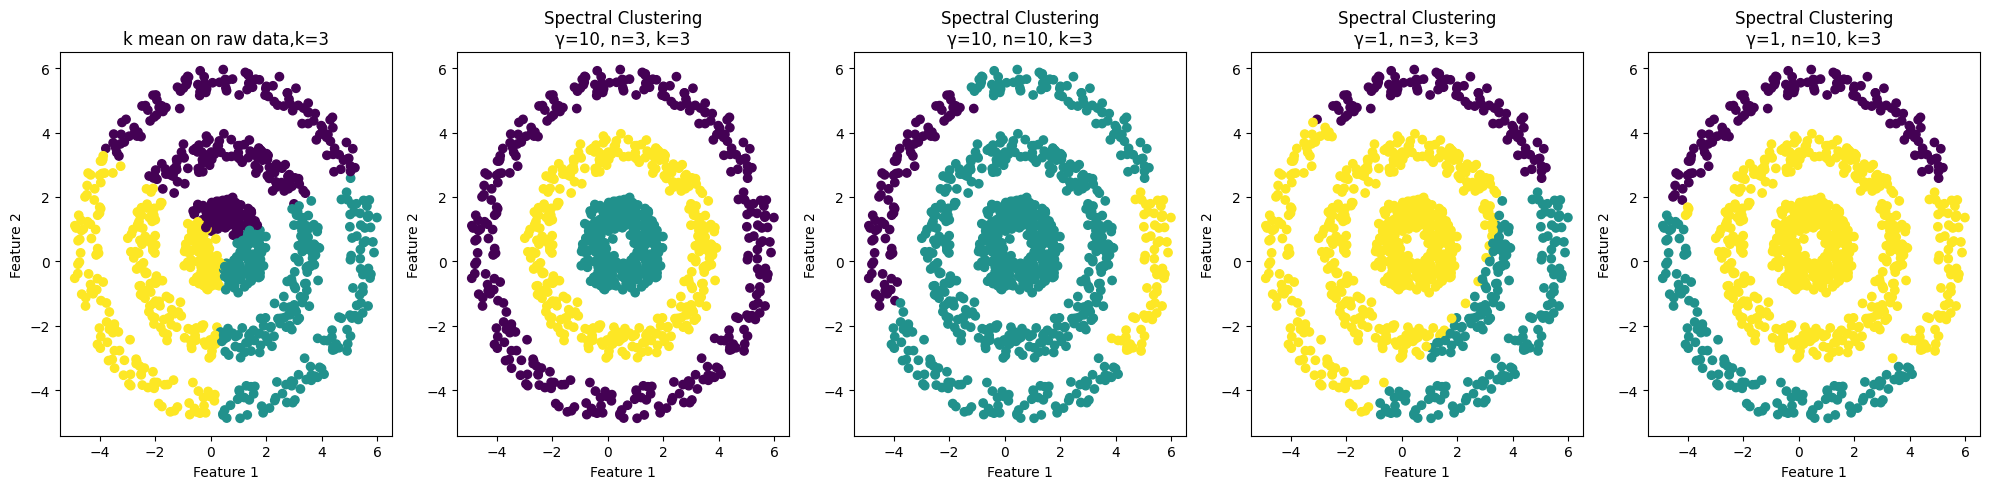

In [84]:
dataA = np.load("Data/Dataset_A.npy")
fig, axs = plt.subplots(1, 5, figsize=(20,5))
ax = axs[0]
labels, C = custom_kmeans(dataA, n_clusters=3, random_state=0)
ax.scatter(dataA[:, 0], dataA[:, 1], c=labels, cmap='viridis')
ax.set_title(f'k mean on raw data,k={3}')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

labels = Laplacian(dataA,10, 3, 3)
axs[1].scatter(dataA[:, 0], dataA[:, 1], c=labels, cmap='viridis')
axs[1].set_title(f'Spectral Clustering\nγ={10}, n={3}, k={3}')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

labels=Laplacian(dataA, 10, 10, 3)
axs[2].scatter(dataA[:, 0], dataA[:, 1], c=labels, cmap='viridis')
axs[2].set_title(f'Spectral Clustering\nγ={10}, n={10}, k={3}')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

labels=Laplacian(dataA,1, 3, 3)
axs[3].scatter(dataA[:, 0], dataA[:, 1], c=labels, cmap='viridis')
axs[3].set_title(f'Spectral Clustering\nγ={1}, n={3}, k={3}')
axs[3].set_xlabel('Feature 1')
axs[3].set_ylabel('Feature 2')

labels=Laplacian(dataA,1, 10, 3)
axs[4].scatter(dataA[:, 0], dataA[:, 1], c=labels, cmap='viridis')
axs[4].set_title(f'Spectral Clustering\nγ={1}, n={10}, k={3}')
axs[4].set_xlabel('Feature 1')
axs[4].set_ylabel('Feature 2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Textwrite cell


**Results Comparison:**

1. **K-means on Raw Data:**
   - The first plot shows the results of applying K-means directly on the raw data with k=3.
   - Clusters are formed based on the Euclidean distance between points in the original feature space.
   
2. **Spectral Clustering with γ=10, n=3, k=3:**
   - Here, spectral clustering is applied with a high gamma value, transforming the data into a lower-dimensional space before clustering.
   - The clusters are more defined and compact compared to raw K-means, especially in regions where clusters overlap in the original space.

3. **Spectral Clustering with γ=10, n=10, k=3:**
   - Increasing \(n\) means using more eigenvectors for clustering.
   - This generally provides a more refined feature representation, capturing more complex structures in the data, leading to better cluster separation.

4. **Spectral Clustering with γ=1, n=3, k=3:**
   - Lower gamma value results in a similarity matrix where even distant points have significant connections.
   - This can cause clusters to merge or become less distinct.

5. **Spectral Clustering with γ=1, n=10, k=3:**
   - Combining a low gamma with more eigenvectors can help somewhat but may still result in less clear clusters compared to higher gamma values.

**Overall Observations:**
- Spectral clustering generally provides better results than applying K-means directly on raw data, particularly in cases where clusters are not well-separated in the original feature space.
- The choice of γ and n significantly affects the clustering results, with higher gamma values and more eigenvectors typically improving cluster separation.
- The method effectively captures the underlying structure of the data, especially when clusters are not linearly separable.

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter.

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label.

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [85]:
# Codewrite cell (Use as you wish)
eps = np.array([0.1,0.3,1])
min_samples = np.array([3,10,30])
dataB = np.load("Data/Dataset_B.npy")


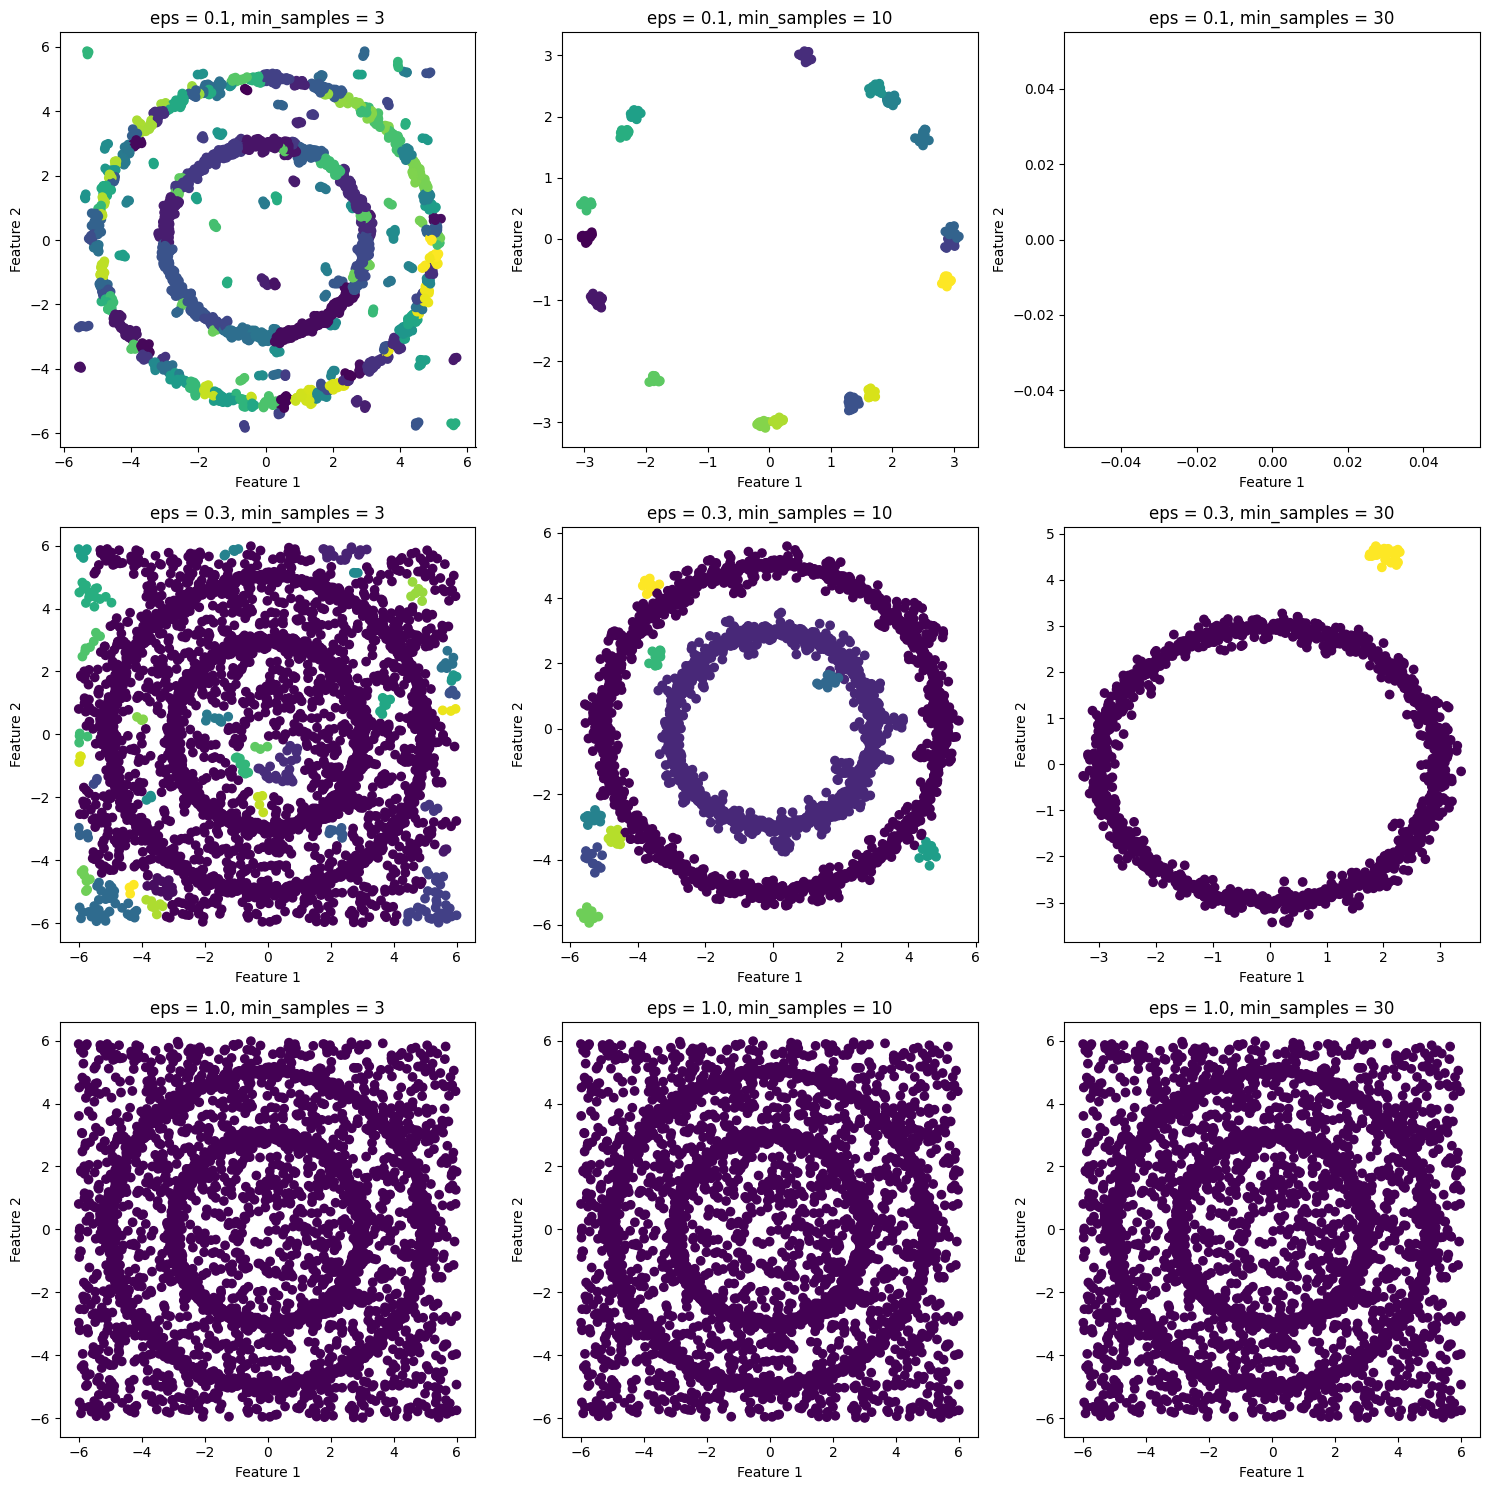

In [86]:
# Codewrite cell. Get the 9 plots here.


fig, axs = plt.subplots(len(eps),len(min_samples), figsize=(15, 15))
for i, ep in enumerate(eps):
  for j, min in enumerate(min_samples):
    clustering = DBSCAN(eps=ep, min_samples=min).fit(dataB)
    labels = clustering.labels_
    non_outliers = labels != -1
    # Plot the results
    X  = dataB[labels!=-1]
    ax = axs[i, j]
    scatter = ax.scatter(X[:,0] , X[:,1], c=labels[non_outliers], cmap='viridis')
    ax.set_title(f'eps = {ep}, min_samples = {min}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # if j == len(min_samples) - 1:
    #     fig.colorbar(scatter, ax=ax)
plt.tight_layout()
plt.show()

# Textwrite cell

### Summary of Conclusions

1. **eps = 0.1**:
   - **min_samples = 3**: Very fine clusters with many small clusters, high sensitivity to noise, and many outliers.
   - **min_samples = 10**: Fewer clusters, but still relatively small and sensitive to noise, with some outliers.
   - **min_samples = 30**: No Clusters, All points are considered noise due to the stringent requirements for forming a cluster.

2. **eps = 0.3**:
   - **min_samples = 3**: Moderate clustering with better-defined clusters than with **eps = 0.1**, still some noise.
   - **min_samples = 10**: Good balance with distinct clusters and fewer outliers, useful for medium-density clusters.
   - **min_samples = 30**: Larger clusters with few outliers, some points that are not noise with lower min_samples become noise here.

3. **eps = 1.0**:
   - **min_samples = 3**: Large clusters, fewer outliers, but may merge distinct clusters into one.
   - **min_samples = 10**: Even larger clusters, very few outliers, most points are included in clusters.
   - **min_samples = 30**: Similar to the previous one, may form one or two very large clusters encompassing most data points.

### Overall Insights

- **Small `eps` values** result in high sensitivity to noise and many small clusters.
- **Larger `eps` values** tend to merge nearby points into larger clusters, reducing the number of outliers.
- **Small `min_samples` values** allow smaller, less dense clusters to form, while **larger `min_samples` values** require higher density, leading to fewer and larger clusters.

The best parameter combination depends on the specific distribution and density of the dataset. For a dataset with well-separated clusters, moderate values like `eps = 0.3` and `min_samples = 10` often yield meaningful results.

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy.

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [87]:
# Codewrite cell (Use as you wish)
def mode(lst):
    frequency = {}
    for item in lst:
        if item not in frequency:
            frequency[item] = 1
        else:
            frequency[item] += 1
    max_count = max(frequency.values())
    for key, value in frequency.items():
        if value == max_count:
            return key

def test_train_split(X_data,Y_data,n,k):
  ind = np.random.choice(n, size=(k))
  X_train = []
  Y_train = []
  for i in ind:
    X_train.append(X_data[i,:])
    Y_train.append(Y_data[i])

  X_train = np.array(X_train)
  Y_train = np.array(Y_train)

  mask = np.ones(n, dtype=bool)
  mask[ind] = False

  # Extract test data using the mask
  X_test = X_data[mask]
  Y_test = Y_data[mask]
  return X_train, Y_train,X_test,Y_test

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = []
        for i in range(len(X_train)):
            dist = euclidean_distance(test_point, X_train[i])
            distances.append((dist, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]
        k_nearest_labels = [label for _, label in k_nearest_neighbors]
        m = mode(k_nearest_labels)
        predictions.append(m)
    return np.array(predictions)


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def pca(X, n_components):
    # Standardize the data (center the data)
    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = practical_eigen_symmetric(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Transform the data
    X_pca = np.dot(X_centered, selected_eigenvectors)

    return X_pca, sorted_eigenvalues, selected_eigenvectors



In [88]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)
# Different values for n and k
n_values = [2, 4, 8, 16, 32]
k_values = [1, 3, 7, 15, 31]
# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, y_train, X_test,  y_test = test_train_split(X, y, 1797, 1500)

result=[]
# Table 1
for k in k_values:
    # Predict on the training set
    y_train_pred = knn_predict(X_train, y_train, X_train, k)
    train_accuracy = accuracy(y_train, y_train_pred)

    # Predict on the testing set
    y_test_pred = knn_predict(X_train, y_train, X_test, k)
    test_accuracy = accuracy(y_test, y_test_pred)
    result.append((k, train_accuracy, test_accuracy))

    # print(f'k={k}: Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

results = []

for n in n_values:
    # Perform PCA
    X_train_pca, eigenvalues, eigenvectors = pca(X_train, n_components=n)
    X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), eigenvectors)

    best_test_accuracy = 0
    best_k = 0

    for k in k_values:
        # Predict on the test set using k-NN
        y_test_pred = knn_predict(X_train_pca, y_train, X_test_pca, k)
        test_accuracy = accuracy(y_test, y_test_pred)

        # Track the best test accuracy and corresponding k
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_k = k

    # Calculate approximation error (sum of squared error from the PCA transformation)
    total_variance = np.sum(np.var(X_train, axis=0))
    explained_variance = np.sum(eigenvalues[:n])
    approximation_error = 1 - (explained_variance / total_variance)

    results.append((n, best_test_accuracy, best_k, approximation_error))


# Print the results
# for n, best_test_accuracy, best_k, approximation_error in results:
#     print(f'n={n}: Best Test Accuracy: {best_test_accuracy:.4f}, Best k: {best_k}, Approximation Error: {approximation_error:.4f}')


In [90]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)
n_values = [2, 4, 8, 16, 32]
k_values = [1, 3, 7, 15, 31]
# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target
noise = np.random.normal(loc=0, scale=1, size=X.shape)
X = X + noise

# Split the dataset into training and testing sets
X_train, y_train, X_test,  y_test = test_train_split(X, y, 1797, 1500)
# Table 3
for k in k_values:
    # Predict on the training set
    y_train_pred = knn_predict(X_train, y_train, X_train, k)
    train_accuracy = accuracy(y_train, y_train_pred)

    # Predict on the testing set
    y_test_pred = knn_predict(X_train, y_train, X_test, k)
    test_accuracy = accuracy(y_test, y_test_pred)
    result.append((k, train_accuracy, test_accuracy))

    # print(f'k={k}: Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

results = []

for n in n_values:
    # Perform PCA
    X_train_pca, eigenvalues, eigenvectors = pca(X_train, n_components=n)
    X_test_pca = np.dot(X_test - np.mean(X_train, axis=0), eigenvectors)

    best_test_accuracy = 0
    best_k = 0

    for k in k_values:
        # Predict on the test set using k-NN
        y_test_pred = knn_predict(X_train_pca, y_train, X_test_pca, k)
        test_accuracy = accuracy(y_test, y_test_pred)

        # Track the best test accuracy and corresponding k
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_k = k

    # Calculate approximation error (sum of squared error from the PCA transformation)
    total_variance = np.sum(np.var(X_train, axis=0))
    explained_variance = np.sum(eigenvalues[:n])
    approximation_error = 1 - (explained_variance / total_variance)

    results.append((n, best_test_accuracy, best_k, approximation_error))

# Print the results
# for n, best_test_accuracy, best_k, approximation_error in results:
#     print(f'n={n}: Best Test Accuracy: {best_test_accuracy:.4f}, Best k: {best_k}, Approximation Error: {approximation_error:.4f}')


# Textwrite cell

Table 1: Raw data, k-NN performance

| k | Training Accuracy | Testing Accuracy |
|---|-------------------|------------------|
| 1 | 1.0000            | 0.9835           |
| 3 | 0.9967            | 0.9886           |
| 7 | 0.9880            | 0.9860           |
| 15| 0.9813            | 0.9797           |
| 31| 0.9640            | 0.9644           |


Table 2: n-component PCA preprocessed data, k-NN performance

| n | Best Test Accuracy | Best k | Approximation Error |
|---|-------------------|--------|---------------------|
| 2 | 0.6696            | 31     | 0.7160              |
| 4 | 0.8704            | 15     | 0.5093              |
| 8 | 0.9695            | 1      | 0.3213              |
| 16| 0.9848            | 1      | 0.1462              |
| 32| 0.9848            | 3      | 0.0318              |



Table 3: Raw noised data, k-NN performance

| k | Training Accuracy | Testing Accuracy |
|---|-------------------|------------------|
| 1 | 1.0000            | 0.9827           |
| 3 | 0.9987            | 0.9790           |
| 7 | 0.9860            | 0.9802           |
| 15| 0.9813            | 0.9715           |
| 31| 0.9680            | 0.9592           |


Table 4: n-component PCA preprocessed noised data, k-NN performance

| n | Best Test Accuracy | Best k | Approximation Error |
|---|-------------------|--------|---------------------|
| 2 | 0.5879            | 31     | 0.7234              |
| 4 | 0.8292            | 15     | 0.5276              |
| 8 | 0.9604            | 7      | 0.3505              |
| 16| 0.9839            | 1      | 0.1766              |
| 32| 0.9827            | 1      | 0.0534              |


# Summary:

- On the raw data, the algorithm achieves a maximum testing accuracy of 0.9886 with k=3. As the value of k increases, the testing accuracy gradually decreases, indicating that a smaller value of k is more suitable for this dataset.
-Similarly, the PCA-preprocessed data also shows a strong performance, with the best testing accuracy of 0.9848 achieved using 16 and 32 principal components, and k=1 or 3.
-The performance on the raw noised data is slightly lower than the performance on the clean data, but the overall trend is similar. The best testing accuracy on the noised data is 0.9839 using 16 principal components and k=1.
-These results suggest that the k-NN algorithm is robust to noise, and that PCA preprocessing can further improve its performance, especially when the number of principal components is sufficient to capture the essential features of the data.


# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3.

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here.

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [91]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):

        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [92]:
# Codewrite cell (Use as you wish)

def random_init(X, n_components):
    np.random.seed(0)
    n_samples, n_features = X.shape
    means = X[np.random.choice(n_samples, n_components, replace=False)]
    covariances = np.array([np.eye(n_features)] * n_components)
    weights = np.ones(n_components) / n_components
    return means, covariances, weights

def custom_multivariate_normal_pdf(x, mean, cov):
    d = x.shape[0]
    det_cov = np.linalg.det(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), d / 2) * np.sqrt(det_cov))
    x_mu = x - mean
    inv_cov = np.linalg.inv(cov)
    result = np.exp(-0.5 * np.dot(np.dot(x_mu.T, inv_cov), x_mu))
    return norm_const * result

def e_step(X, means, covariances, weights):
    n_samples = X.shape[0]
    n_components = len(weights)
    responsibilities = np.zeros((n_samples, n_components))

    for k in range(n_components):
        for i in range(n_samples):
            responsibilities[i, k] = weights[k] * custom_multivariate_normal_pdf(X[i], means[k], covariances[k])

    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def m_step(X, responsibilities):
    n_samples, n_features = X.shape
    n_components = responsibilities.shape[1]

    Nk = responsibilities.sum(axis=0)
    weights = Nk / n_samples
    means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
    covariances = np.zeros((n_components, n_features, n_features))

    for k in range(n_components):
        diff = X - means[k]
        covariances[k] = np.dot((responsibilities[:, k] * diff.T), diff) / Nk[k]

    return means, covariances, weights

def compute_log_likelihood(X, means, covariances, weights):
    n_samples = X.shape[0]
    log_likelihood = 0

    for i in range(n_samples):
        prob = 0
        for k in range(len(weights)):
            prob += weights[k] * custom_multivariate_normal_pdf(X[i], means[k], covariances[k])
        log_likelihood += np.log(prob)

    return log_likelihood

def compute_lower_bound(X, responsibilities, means, covariances, weights):
    n_samples, n_features = X.shape
    n_components = responsibilities.shape[1]

    lower_bound = 0

    for i in range(n_samples):
        for k in range(n_components):
            if responsibilities[i, k] > 0:
                lower_bound += responsibilities[i, k] * (
                    np.log(weights[k])
                    + np.log(custom_multivariate_normal_pdf(X[i], means[k], covariances[k]))
                    - np.log(responsibilities[i, k]))
    return lower_bound

def train_gmm(X, n_components, n_iterations):
    means, covariances, weights = random_init(X, n_components)
    log_likelihoods = []
    lower_bounds = []
    responsibilities = None

    for i in range(n_iterations):
        responsibilities = e_step(X, means, covariances, weights)
        means, covariances, weights = m_step(X, responsibilities)
        log_likelihood = compute_log_likelihood(X, means, covariances, weights)
        lower_bound = compute_lower_bound(X, responsibilities, means, covariances, weights)
        log_likelihoods.append(log_likelihood)
        lower_bounds.append(lower_bound)
    return means, covariances, weights, log_likelihoods, lower_bounds


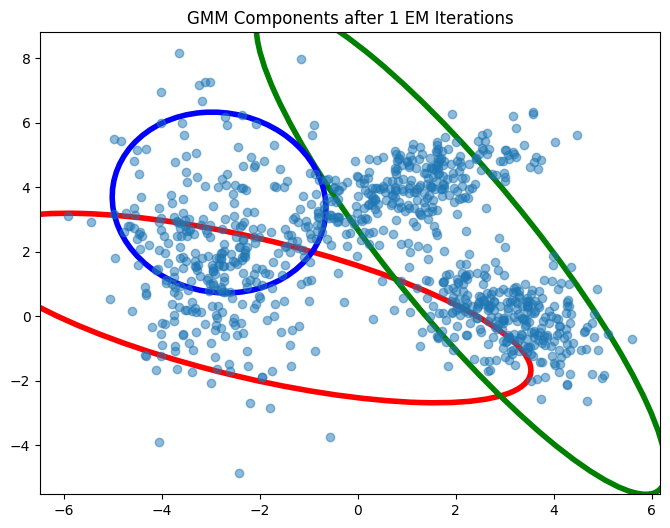

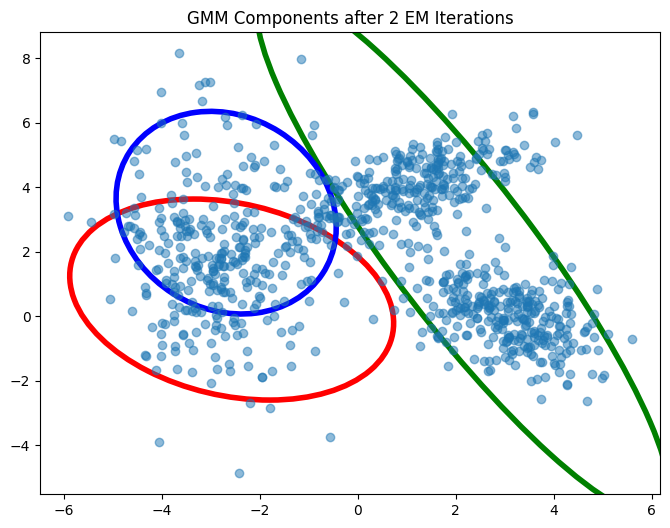

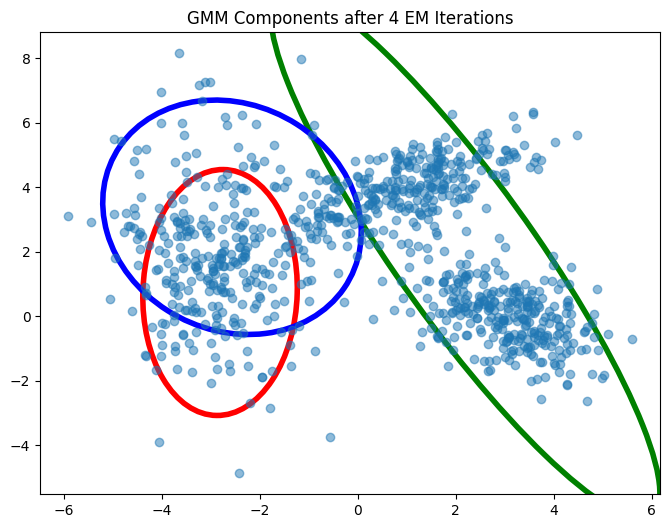

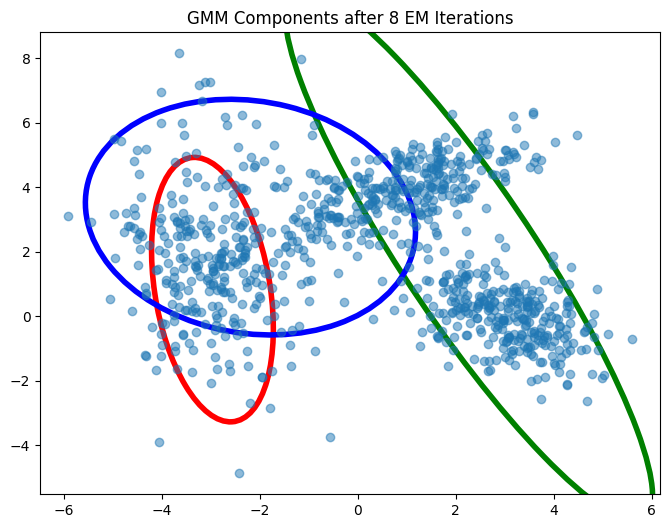

In [93]:
# Code write: Get the four plots with component contours here
# Load the dataset
dataC = np.load('Data/Dataset_C.npy')
n_components = 3
iterations_list = [1, 2, 4, 8]
results = {}

for n_itr in iterations_list:
    means, covariances, weights, log_likelihoods, lower_bounds = train_gmm(dataC, n_components, n_itr)
    results[n_itr] = (means, covariances, weights, log_likelihoods, lower_bounds)

# Plot the GMM components and data points for each specified iteration
for n_itr in iterations_list:
    means, covariances, weights, log_likelihoods, lower_bounds = results[n_itr]
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_ellipses_gmm(means, covariances, ax)
    ax.scatter(dataC[:, 0], dataC[:, 1], alpha=0.5)
    ax.set_title(f'GMM Components after {n_itr} EM Iterations')
    plt.show()

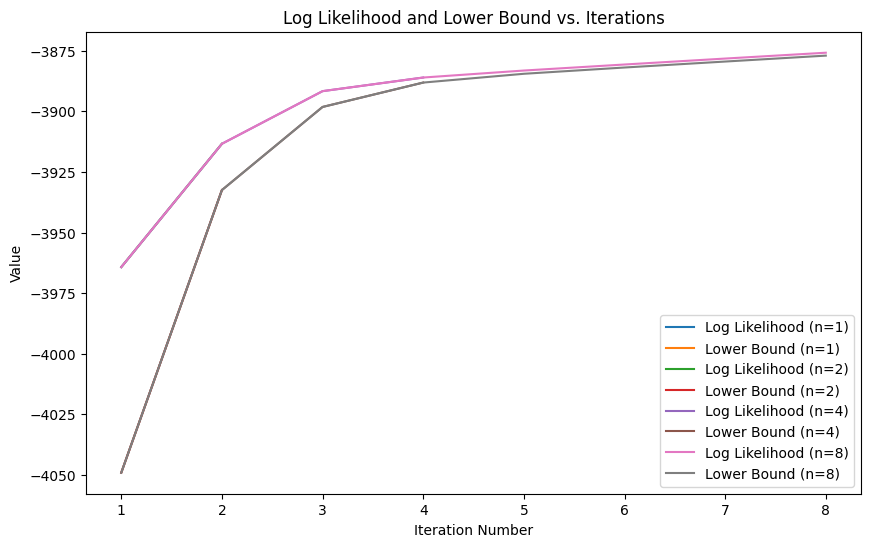

In [94]:


#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here.
# Plot the log likelihood and the lower bound as a function of the iteration number
fig, ax = plt.subplots(figsize=(10, 6))
for n_itr in iterations_list:
    means, covariances, weights, log_likelihoods, lower_bounds = results[n_itr]
    ax.plot(range(1, n_itr + 1), log_likelihoods, label=f'Log Likelihood (n={n_itr})')
    ax.plot(range(1, n_itr + 1), lower_bounds, label=f'Lower Bound (n={n_itr})')

ax.set_xlabel('Iteration Number')
ax.set_ylabel('Value')
ax.legend()
ax.set_title('Log Likelihood and Lower Bound vs. Iterations')
plt.show()
